### Introduction
- In this assignment, you will build a two layer neural network for classification from scratch using only numpy.
- Please refer to videos on Backpropagation and one reference material shared in additional resources for the understanding required to solve this assignment

In [ ]:
""" Some functions required for testing """
import numpy as np
import tensorflow.keras as keras
import tensorflow as tf

def create_model(D, H, C):
  il = keras.layers.Input(shape=(D,))
  hl = keras.layers.Dense(H, activation = 'relu')(il)
  ol = keras.layers.Dense(C, activation = 'softmax')(hl)
  model = keras.models.Model(inputs = [il], outputs = [ol])

  rng = np.random.RandomState(2020)
  model.layers[1].set_weights([rng.rand(D * H).reshape(D, H), rng.rand(H, )])
  model.layers[2].set_weights([rng.rand(H * C).reshape(H, C), rng.rand(C, )])
  return model

def create_inputs(N, D):
  rng = np.random.RandomState(2020)
  return rng.rand(N * D).reshape(N, D)

def set_weights_from_model(tln, test_net):
  tln.params['W1'] = test_net.layers[1].get_weights()[0]
  tln.params['b1'] = test_net.layers[1].get_weights()[1]
  tln.params['W2'] = test_net.layers[2].get_weights()[0]
  tln.params['b2'] = test_net.layers[2].get_weights()[1]
  return tln


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class TwoLayerNet(object):
    """
    A two-layer fully-connected neural network. The net has an input dimension of
    D, a hidden layer dimension of H, and performs classification over C classes.
    We train the network with a softmax loss function and L2 regularization on the
    weight matrices. The network uses a ReLU nonlinearity after the first fully
    connected layer.

    In other words, the network has the following architecture:

    input - fully connected layer - ReLU - fully connected layer - softmax

    The outputs of the second fully-connected layer are the scores for each class.
    """

    def __init__(self, input_size, hidden_size, output_size, std=1e-4):
        """
        Initialize the model. 
        Weights are initialized to small random values and
        biases are initialized to zero. 
        Weights and biases are stored in the
        variable self.params, which is a dictionary with the following keys:

        W1: First layer weights; has shape (D, H)
        b1: First layer biases; has shape (H,)
        W2: Second layer weights; has shape (H, C)
        b2: Second layer biases; has shape (C,)

        Inputs:
        - input_size: The dimension N of the input data.
        - hidden_size: The number of neurons H in the hidden layer.
        - output_size: The number of classes C.
        """
        self.params = {}
        ### Write your code here
        W1 = ((2*np.random.random((input_size, hidden_size)))  - 1)*0.01/2
        b1 = np.zeros(shape = (hidden_size, ))
        W2 = ((2*np.random.random((hidden_size, output_size))) - 1)*0.01/2
        b2 = np.zeros(shape = (output_size, ))
        self.params = {
            "W1": W1,
            "b1": b1,
            "W2": W2,
            "b2": b2
        }

In [ ]:
""" Test Cases for Initialization"""
tln = TwoLayerNet(2, 3, 2)
assert tln.params['W1'].shape == (2, 3)
assert tln.params['b1'].shape == (3, )
assert tln.params['W2'].shape == (3, 2)
assert tln.params['b2'].shape == (2, )
print('Test passed', '\U0001F44D')

Test passed 👍


In [ ]:
class TwoLayerNet(TwoLayerNet):

    def forward(self, X):
      """
      Compute the output of a full forward pass of the network.
      
      First apply weights W1 and biases b1 on inputs and then apply relu non-linearity.
      Then apply weights W2 and biases b2 on hidden layer values and then apply softmax non-linearity to get the output
      
      Inputs:
      - X : Input data of shape (N, D). Each X[i] is a training sample
      
      Outputs:
      - y_out : numpy array with Outputs of shape (N, C)
      
      """
      ### Write your code here
      W1 = self.params["W1"]
      W2 = self.params["W2"]
      b1 = self.params["b1"]
      b2 = self.params["b2"]

      v1 = np.dot(X, W1) + b1
      h1 = np.maximum(v1, 0)
      v2 = np.dot(h1, W2) + b2
      h2 = np.zeros((v2.shape[0],v2.shape[1]))
      for i in range(v2.shape[0]):
        h2[i] = (np.exp(v2[i])/sum(np.exp(v2[i])))
      y_out = h2
      return y_out

In [ ]:
"""Test Cases for Forward pass"""
tln = TwoLayerNet(2, 4, 2)
test_net = create_model(2, 4, 2)
tln = set_weights_from_model(tln, test_net)
X = create_inputs(4, 2)
y_forward = tln.forward(X)
assert y_forward.shape == (4, 2)
assert np.all(np.isclose(y_forward, test_net.predict(X), atol = 0.0001))
print('Test passed', '\U0001F44D')

Test passed 👍


In [ ]:
class TwoLayerNet(TwoLayerNet):
    def predict(self, X):
        """
        Use the trained weights of this two-layer network to predict labels for
        data points. For each data point we predict scores for each of the C
        classes, and assign each data point to the class with the highest score.

        Inputs:
        - X: A numpy array of shape (N, D) giving N D-dimensional data points to
          classify.

        Returns:
        - y_pred: A numpy array of shape (N,) giving predicted labels for each of
          the elements of X. For all i, y_pred[i] = c means that X[i] is predicted
          to have class c, where 0 <= c < C.
        """
        y_pred = None

        ###########################################################################
        # TODO: Implement this function; it should be VERY simple!                #
        ###########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        ### Write your code here
        y_pred = []
        y_out = self.forward(X)
        for i in range(y_out.shape[0]):
          y_pred.append(np.argmax(y_out[i]))
        y_pred = np.asarray(y_pred, dtype=np.int_)
        return y_pred


In [ ]:
""" Test Cases for predict"""
tln = TwoLayerNet(2, 4, 2)
test_net = create_model(2, 4, 2)
tln = set_weights_from_model(tln, test_net)
X = create_inputs(4, 2)
y_pred = tln.predict(X)
test_pred = np.argmax(test_net.predict(X), axis = 1)
assert np.all(np.isclose(y_pred, test_pred, atol = 0.01))
print('Test passed', '\U0001F44D')

Test passed 👍


#### Loss
Note: <br>
$L = -\sum{t_i \log{p_i}}$ <br>
where $p_i$ is probability score predicted by model. <br>
$t_i = 0$ for the true class $i$ and $t_i = 1$ for all other classes for a particular sample.

In [ ]:
class TwoLayerNet(TwoLayerNet):    
    def loss(self, X, y=None):
        """
        Compute the loss and gradients for a two layer fully connected neural
        network.

        Inputs:
        - X: Input data of shape (N, D). Each X[i] is a training sample.
        - y: Vector of training labels. y[i] is the label for X[i], and each y[i] is
          an integer in the range 0 <= y[i] < C.


        Returns:
        If y is None, return a matrix scores of shape (N, C) where scores[i, c] is
        the score for class c on input X[i].

        If y is not None, instead return a tuple of:
        - loss: Loss (data loss and regularization loss) for this batch of training
          samples. (This is the mean loss over N samples)
        - grads: Dictionary mapping parameter names to gradients of those parameters
          with respect to the loss function; has the same keys as self.params.
        """
        # Unpack variables from the params dictionary
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        N, D = X.shape
        H, C = W2.shape
        
        # Compute the forward pass
        scores = None
        #############################################################################
        # TODO: Perform the forward pass, computing the class scores for the input. #
        # Store the result in the scores variable, which should be an array of      #
        # shape (N, C).                                                             #
        #############################################################################
        
        
        
        ## Write your code here
        
        v1 = np.dot(X, W1) + b1
        h1 = np.maximum(v1, 0)
        v2 = np.dot(h1, W2) + b2
        h2 = []
        for i in range(v2.shape[0]):
          h2.append(np.exp(v2[i])/sum(np.exp(v2[i])))
        scores = np.asarray(h2)

        y = np.asarray(y)
        if(y.all()==None):
          return scores
        
        # # Compute the loss
        loss = None

        
        #############################################################################
        # TODO: Finish the forward pass, and compute the loss. This should include  #
        # both the data loss and L2 regularization for W1 and W2. Store the result  #
        # in the variable loss, which should be a scalar. Use the Categorical       #
        # Cross Entropy loss.                                                       #
        #############################################################################
      
        ### Write your code here

        t_i = np.zeros((N,C), dtype=np.int_)
        for i in range(N):
          for j in range(C):
            if (j==y[i]):
              t_i[i,j] = 1

        data_loss = np.sum(np.sum(t_i*np.log(scores)))

        data_loss = -data_loss/N
        lam = 0.001

        l2 = (lam/(2*N) * np.sum(W1** 2)) + (lam/(2*N) * np.sum(W2 ** 2))

        loss = data_loss #+ l2

        # Backward pass: compute gradients
        grads = {}
        
        #############################################################################
        # TODO: Compute the backward pass, computing the derivatives of the weights #
        # and biases. Store the results in the grads dictionary. For example,       #
        # grads['W1'] should store the gradient on W1, and be a matrix of same size #
        #############################################################################
        
        ### Write your code here

        output_error = (scores-t_i)/scores.shape[0] #dl/d(softmax) = (pi - yi)/N
        grad_W2 = np.dot(h1.T, output_error)
        grad_b2 = np.sum(output_error, axis=0)
        hidden_error = np.dot((scores-t_i)/scores.shape[0], W2.T)
        grad_W1 = np.dot(X.T, hidden_error)
        grad_b1 = np.sum(hidden_error, axis=0)

        grads = {
            "W1": grad_W1,
            "b1": grad_b1,
            "W2": grad_W2,
            "b2": grad_b2
        }

        return loss, grads

In [ ]:
""" Tests for loss and gradient computation """
### First compute loss and gradients using keras
model = create_model(2, 4, 2)
X = create_inputs(4, 2)
y = np.array([0, 1, 1, 0])
y_onehot = keras.utils.to_categorical(y, 2)

optimizer = keras.optimizers.SGD(learning_rate=1e-3, momentum=0.0, nesterov=False, name="SGD")
loss_fn = keras.losses.CategoricalCrossentropy()
batch_size = 4
train_dataset = tf.data.Dataset.from_tensor_slices((X, y_onehot))
train_dataset = train_dataset.batch(batch_size)
epochs = 1
for epoch in range(epochs):
  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
    with tf.GradientTape() as tape:
      y_out = model(x_batch_train, training = True)

      ## Compute loss value for this minibatch
      loss_value = loss_fn(y_batch_train, y_out)
    
    grads_model = {}
    grads_model['W1'], grads_model['b1'], grads_model['W2'], grads_model['b2'] = [dw.numpy() for dw in tape.gradient(loss_value, model.trainable_weights)]

### Compute loss and gradients using TwoLayerNet
tln = TwoLayerNet(2, 4, 2)
tln = set_weights_from_model(tln, model)
loss, grads_tln = tln.loss(X, y)

#### Now match
## Loss should be correctly computed
assert np.isclose(loss, loss_value.numpy(), atol = 0.0001)

## Gradients should be correctly computed
assert np.all(np.isclose(grads_tln['W1'], grads_model['W1'], atol = 0.0001))
assert np.all(np.isclose(grads_tln['b1'], grads_model['b1'], atol = 0.0001))
assert np.all(np.isclose(grads_tln['W2'], grads_model['W2'], atol = 0.0001))
assert np.all(np.isclose(grads_tln['b2'], grads_model['b2'], atol = 0.0001))

print('Test passed', '\U0001F44D')

Test passed 👍


### Training

In [ ]:
class TwoLayerNet(TwoLayerNet):
    def train(self, X, y, X_val, y_val,
              learning_rate=1e-3, num_iters=100,
              batch_size=200, verbose=False):
        """
        Train this neural network using stochastic gradient descent.

        Inputs:
        - X: A numpy array of shape (N, D) giving training data.
        - y: A numpy array f shape (N,) giving training labels; y[i] = c means that
          X[i] has label c, where 0 <= c < C.
        - X_val: A numpy array of shape (N_val, D) giving validation data.
        - y_val: A numpy array of shape (N_val,) giving validation labels.
        - learning_rate: Scalar giving learning rate for optimization.
        - num_iters: Number of steps to take when optimizing.
        - batch_size: Number of training examples to use per step.
        """
        num_train = X.shape[0]
        iterations_per_epoch = max(num_train / batch_size, 1)

        # Use SGD to optimize the parameters in self.model
        loss_history = []
        train_acc_history = []
        val_acc_history = []

        np.random.shuffle(X)
        state = np.random.get_state()
        np.random.set_state(state)
        np.random.shuffle(y)

        for it in range(num_iters):
              X_batch = None
              y_batch = None

            #########################################################################
            # TODO: Create a random minibatch of training data and labels, storing  #
            # them in X_batch and y_batch respectively.                             #
            #########################################################################

            
            ### Write your code here
            
              start = (num_iters * batch_size)%X.shape[0]
              X_batch = X[start: start+batch_size]
              y_batch = y[start: start+batch_size]


              # Compute loss and gradients using the current minibatch
              loss, grads = self.loss(X=X_batch, y=y_batch)
              loss_history.append(loss)
              # print(loss)

            #########################################################################
            # TODO: Use the gradients in the grads dictionary to update the         #
            # parameters of the network (stored in the dictionary self.params)      #
            # using stochastic gradient descent. You'll need to use the gradients   #
            # stored in the grads dictionary defined above.                         #
            #########################################################################

            
              ### Write your code here
              self.params["W1"] -= (learning_rate * grads["W1"])
              self.params["b1"] -= (learning_rate * grads["b1"])
              self.params["W2"] -= (learning_rate * grads["W2"])
              self.params["b2"] -= (learning_rate * grads["b2"])
            # Every epoch, check train and val accuracy
              if it % iterations_per_epoch == 0:
                # Check accuracy

                train_acc = (self.predict(X_batch) == y_batch).mean()
                val_acc = (self.predict(X_val) == y_val).mean()
                train_acc_history.append(train_acc)
                val_acc_history.append(val_acc)

                # Decay learning rate
                learning_rate *= 1

        return {
          'loss_history': loss_history,
          'train_acc_history': train_acc_history,
          'val_acc_history': val_acc_history,
        }


### Using these networks on datasets

### XOR
Use TwoLayerNet to train the XOR function discussed in the class

[0.09931287050361885, 0.09931934106132823, 0.09932581182589902, 0.09933228279718062, 0.09933875397502256, 0.09934522535927462, 0.09935169694978627, 0.09935816874640727, 0.09936464074898765, 0.0993711129573771]


array([1, 1, 0, 1, 1, 0, 1, 1])

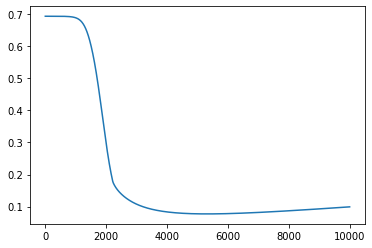

In [ ]:
### Write your code here

X = np.array([
              [0,0,0],
              [0,0,1],
              [0,1,0],
              [0,1,1],
              [1,0,0],
              [1,0,1],
              [1,1,0],
              [1,1,1]
])

y = np.array([0,1,1,0,1,0,0,1])

np.random.shuffle(X)
state = np.random.get_state()
np.random.set_state(state)
np.random.shuffle(y)

X_train, X_val = X[:6], X[6:]
y_train, y_val = y[:6], y[6:]

xor_net = TwoLayerNet(3, 5, 2)

results = xor_net.train(X_train, y_train, X_val, y_val,
              learning_rate=0.01, num_iters=10000,
              batch_size=4, verbose=False)

import matplotlib.pyplot as plt
plt.plot(results['loss_history'])
print(results['loss_history'][-10:])
xor_net.predict(X)

### Iris
Use TwoLayerNet to train the iris dataset. Choose 120 samples randomly for training and the rest for testing

[1.0260511822368723, 1.026051116446566, 1.0260510767093336, 1.0260510436969077, 1.0260510140767156, 1.0260509874930548, 1.026050964414644, 1.0260509444462476, 1.0260509279535979, 1.0260509145604926]


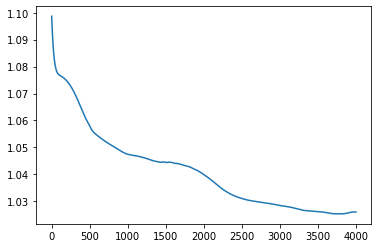

In [ ]:
### Write your code here
from sklearn.datasets import load_iris
import pandas as pd

data, target = load_iris(return_X_y=True)

np.random.shuffle(data)
state = np.random.get_state()
np.random.set_state(state)
np.random.shuffle(target)

data_train = data[:120]
target_train = target[:120]

data_test = data[120:]
target_test = target[120:]

iris_net = TwoLayerNet(4, 64, 3)
results = iris_net.train(data_train, target_train, data_test, target_test,
              learning_rate=0.05, num_iters=4000,
              batch_size=60, verbose=False)

import matplotlib.pyplot as plt
plt.plot(results['loss_history'])
print(results['loss_history'][-10:])

### Advanced
Add weight regularization to the loss and rewrite backprop part of TwoLayerNet. <br>
Train using some datasets and see if regularized network performs better than its older counterpart.
<br>
The expression for loss with regularization is as follows - <br>
$L = -\sum{t_i \log{p_i}} + \lambda(|w_1|^2 + |w_2|^2)$ <br>
$\lambda$ is a tunable hyper-parameter  denoting strength of regularization. <br>
If it is too high, network will struggle to fit, and if it is too low, network will overfit.

In [ ]:
### Write your code here
class TwoLayerNet(TwoLayerNet):    
    def loss(self, X, y=None):
        """
        Compute the loss and gradients for a two layer fully connected neural
        network.

        Inputs:
        - X: Input data of shape (N, D). Each X[i] is a training sample.
        - y: Vector of training labels. y[i] is the label for X[i], and each y[i] is
          an integer in the range 0 <= y[i] < C.


        Returns:
        If y is None, return a matrix scores of shape (N, C) where scores[i, c] is
        the score for class c on input X[i].

        If y is not None, instead return a tuple of:
        - loss: Loss (data loss and regularization loss) for this batch of training
          samples. (This is the mean loss over N samples)
        - grads: Dictionary mapping parameter names to gradients of those parameters
          with respect to the loss function; has the same keys as self.params.
        """
        # Unpack variables from the params dictionary
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        N, D = X.shape
        H, C = W2.shape
        
        # Compute the forward pass
        scores = None
        #############################################################################
        # TODO: Perform the forward pass, computing the class scores for the input. #
        # Store the result in the scores variable, which should be an array of      #
        # shape (N, C).                                                             #
        #############################################################################
        
        
        
        ## Write your code here
        
        v1 = np.dot(X, W1) + b1
        h1 = np.maximum(v1, 0)
        v2 = np.dot(h1, W2) + b2
        h2 = []
        for i in range(v2.shape[0]):
          h2.append(np.exp(v2[i])/sum(np.exp(v2[i])))
        scores = np.asarray(h2)

        if(y.all()==None):
          return scores
        
        # # Compute the loss
        loss = None

        
        #############################################################################
        # TODO: Finish the forward pass, and compute the loss. This should include  #
        # both the data loss and L2 regularization for W1 and W2. Store the result  #
        # in the variable loss, which should be a scalar. Use the Categorical       #
        # Cross Entropy loss.                                                       #
        #############################################################################
      
        ### Write your code here

        t_i = np.zeros((N,C), dtype=np.int_)
        for i in range(N):
          for j in range(C):
            if (j==y[i]):
              t_i[i,j] = 1

        data_loss = np.sum(np.sum(t_i*np.log(scores)))

        data_loss = -data_loss/N
        lam = 0.001

        l2 = (lam * np.sum(W1** 2)) + (lam * np.sum(W2 ** 2))

        loss = data_loss + l2

        # Backward pass: compute gradients
        grads = {}
        
        #############################################################################
        # TODO: Compute the backward pass, computing the derivatives of the weights #
        # and biases. Store the results in the grads dictionary. For example,       #
        # grads['W1'] should store the gradient on W1, and be a matrix of same size #
        #############################################################################
        
        ### Write your code here

        output_error = (scores-t_i)/scores.shape[0] #dl/d(softmax) = (pi - yi)/N
        grad_W2 = np.dot(h1.T, output_error)
        grad_b2 = np.sum(output_error, axis=0)
        hidden_error = np.dot((scores-t_i)/scores.shape[0], W2.T)
        grad_W1 = np.dot(X.T, hidden_error)
        grad_b1 = np.sum(np.dot(X.T, hidden_error), axis=0)

        grads = {
            "W1": grad_W1,
            "b1": grad_b1,
            "W2": grad_W2,
            "b2": grad_b2
        }

        return loss, grads